En esta seccion se cargan los datos y se hace el preprocesado, ademas tambien al final se presentan los resultaados y las repsuestas a las preguntas que se hicieron en el tp.


#Conectamos a google drive e importamos librerias
Conecto a google drive e importo librerias

In [7]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [8]:
import pandas as pd
!pip install pandas_summary
from pandas_summary import DataFrameSummary
import numpy as np
import datetime
!pip install isoweek
from isoweek import Week
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
!pip install sklearn_pandas
from sklearn_pandas import DataFrameMapper

# Para importar el Helper
%cd "/gdrive/Shareddrives/Redes de Piluchina/TP 2_final"
!pip install import-ipynb
import import_ipynb
from Helper import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/gdrive/Shareddrives/Redes de Piluchina/TP 2_final
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
importing Jupyter notebook from Helper.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Analisis de los datasets**

A continuacion se exploran y se exportan los dataset de train, test y stores otorgados oficialmente por la competencia, y ademas los que se incluyeron de manera extra por participantes, como por ejemplo weather, googletrend, state_names etc.

In [ ]:
PATH = "/gdrive/Shareddrives/Redes de Piluchina/TP 2_final/dataset/"

In [ ]:
table_names = ['train', 'store', 'store_states', 'state_names', 'googletrend', 'weather', 'test'] 
train, store, store_states, state_names, googletrend, weather, test = dfs = [pd.read_csv(PATH + fname+'.csv', low_memory=False) for fname in table_names]

Como se explico anteriormente hay datasets que fueron brindados por la competencia, mientras que otros fueron agregados por los participantes, para la realizacion del tp se usaran los siguientes datasets:

- train: Training set dado por la competencia. Contiene información de la tienda a diario.

- store: Listado de las tiendas. Información general sobre la tienda, incluida la competencia

- store_states: Localización del estado Aleman en el que se encuentran las tiendas.

- state_names: Lista de los nombres de los estados Alemanes.

- googletrend: Tendencia de ciertas palabras clave de Google a lo largo del tiempo, que los usuarios encuentran que se correlacionan bien con los datos dados. Estos son datos de tendencias para una semana / estado en particular.

- weather: Clima para cada estado

- test: Testing set dado por la competencia. Trae las mismas variables que el train, solo que sin la columna 'sales' ni 'customers'.

##Train

In [ ]:
display(train.head())
display(DataFrameSummary(train).summary())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1017209.0,1017209.0,NaN,1017209.0,1017209.0,1017209.0,1017209.0,NaN,1017209.0
mean,558.429727,3.998341,NaN,5773.818972,633.145946,0.830107,0.381515,NaN,0.178647
std,321.908651,1.997391,NaN,3849.926175,464.411734,0.375539,0.485759,NaN,0.383056
min,1.0,1.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0
25%,280.0,2.0,NaN,3727.0,405.0,1.0,0.0,NaN,0.0
50%,558.0,4.0,NaN,5744.0,609.0,1.0,0.0,NaN,0.0
75%,838.0,6.0,NaN,7856.0,837.0,1.0,1.0,NaN,0.0
max,1115.0,7.0,NaN,41551.0,7388.0,1.0,1.0,NaN,1.0
counts,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
uniques,1115,7,942,21734,4086,2,2,4,2


Los campos representan la siguiente informacion:

*   Id - un Id que representa la dupla (Almacenamiento, Fecha) dentro del conjunto de prueba

*   Store - una identificación única para cada tienda

*  Sales - la facturación de un día determinado (esto es lo que está prediciendo)


*   Customers - el número de clientes en un día determinado

*   Open - un indicador de si la tienda estaba abierta: 0 = cerrada, 1 = abierta

*   Promo - indica si una tienda está realizando una promoción ese día

*   StateHoliday - indica un feriado estatal. Normalmente, todas las tiendas, con pocas excepciones, están cerradas los días festivos estatales. Tenga en cuenta que todas las escuelas están cerradas los días festivos y los fines de semana. a = festivo, b = festivo de Semana Santa, c = Navidad, 0 = Ninguno

*  SchoolHoliday - indica si (Store, Date) se vio afectada por el cierre de las escuelas públicas




Se puede ver que todos los campos tienen misma cantidad de counts y ademas no tienen missing.

In [ ]:
train['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
train['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

##Store

In [ ]:
display(store.head())
display(DataFrameSummary(store).summary())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.0,NaN,NaN,1112.0,761.0,761.0,1115.0,571.0,571.0,NaN
mean,558.0,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.17472,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.0,NaN,NaN,20.0,1.0,1900.0,0.0,1.0,2009.0,NaN
25%,279.5,NaN,NaN,717.5,4.0,2006.0,0.0,13.0,2011.0,NaN
50%,558.0,NaN,NaN,2325.0,8.0,2010.0,1.0,22.0,2012.0,NaN
75%,836.5,NaN,NaN,6882.5,10.0,2013.0,1.0,37.0,2013.0,NaN
max,1115.0,NaN,NaN,75860.0,12.0,2015.0,1.0,50.0,2015.0,NaN
counts,1115,1115,1115,1112,761,761,1115,571,571,571
uniques,1115,4,3,654,12,23,2,24,7,3


Los campos representan la siguiente informacion:

*   Store - una identificación única para cada tienda

*   Assortment -  describe un nivel de surtido: a = básico, b = extra, c = ampliado

*  StoreType - diferencia entre 4 modelos de tienda diferentes: a, b, c, d

*   CompetitionDistance -distancia en metros a la tienda competidora más cercana


*  CompetitionOpenSince[Month/Year] - proporciona el año y el mes aproximados del momento en que se abrió el competidor más cercano



*   Promo2 - Promo2 es una promoción continua y consecutiva para algunas tiendas: 0 = la tienda no participa, 1 = la tienda participa

*   Promo2Since[Year/Week] -describe el año y la semana calendario en que la tienda comenzó a participar en Promo2


*   PromoInterval - describe los intervalos consecutivos en los que se inicia Promo2, nombrando los meses en que la promoción se inicia de nuevo. P.ej. "Feb, May, Ago, Nov" significa que cada ronda comienza en febrero, mayo, agosto y noviembre de un año determinado para esa tienda


In [ ]:
store['StoreType'].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [ ]:
store['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

##Store_states

Aca se tiene informacion acerca de la localizacion de la tienda, particularmente en que estado de Alemnia(con acronimo)

In [ ]:
display(store_states.head(20))
display(DataFrameSummary(store_states).summary())

,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN
5,6,SN
6,7,SH
7,8,SH
8,9,NW
9,10,"HB,NI"


,Store,State
count,1115.0,NaN
mean,558.0,NaN
std,322.01708,NaN
min,1.0,NaN
25%,279.5,NaN
50%,558.0,NaN
75%,836.5,NaN
max,1115.0,NaN
counts,1115,1115
uniques,1115,12


Se puede ver que no hay falta de datos.

##State_names

Aca se asocia cada acronimo con el nombre del estado correspondiente.

In [ ]:
display(state_names.head(20))
display(DataFrameSummary(state_names).summary())

,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB
5,Hamburg,HH
6,Hessen,HE
7,MecklenburgVorpommern,MV
8,Niedersachsen,"HB,NI"
9,NordrheinWestfalen,NW


,StateName,State
count,16,16
unique,16,16
top,BadenWuerttemberg,BW
freq,1,1
counts,16,16
uniques,16,16
missing,0,0
missing_perc,0%,0%
types,unique,unique


Se puede ver que hay una totalidad de 16 estados, y que no hay falta de datos.

##Googletrend

- week: Semana en la que se esta evaluando el googletrend.

- trend: Cantidad de busquedas de las palabras que llevan al store esa semana.

In [ ]:
display(googletrend)
display(DataFrameSummary(googletrend).summary())

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67
...,...,...,...
2067,Rossmann_DE_SL,2015-08-30 - 2015-09-05,95
2068,Rossmann_DE_SL,2015-09-06 - 2015-09-12,47
2069,Rossmann_DE_SL,2015-09-13 - 2015-09-19,80
2070,Rossmann_DE_SL,2015-09-20 - 2015-09-26,57


,file,week,trend
count,NaN,NaN,2072.0
mean,NaN,NaN,63.814189
std,NaN,NaN,12.650246
min,NaN,NaN,0.0
25%,NaN,NaN,55.0
50%,NaN,NaN,64.0
75%,NaN,NaN,72.0
max,NaN,NaN,100.0
counts,2072,2072,2072
uniques,14,148,68


En este caso tampoco hay datos perdidos.

##Weather

In [ ]:
display(weather)
display(DataFrameSummary(weather[['Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'Precipitationmm']]).summary())

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15835,Saarland,2015-09-13,21,17,12,16,14,12,100,88,...,31.0,15.0,10.0,27,10,50.0,1.02,7.0,Rain,113
15836,Saarland,2015-09-14,18,14,11,15,12,7,99,85,...,31.0,13.0,4.0,32,16,53.0,9.91,5.0,Rain-Thunderstorm,213
15837,Saarland,2015-09-15,16,12,9,11,8,7,93,77,...,31.0,12.0,10.0,34,14,NaN,0.00,5.0,Rain,193
15838,Saarland,2015-09-16,19,15,11,16,13,10,97,90,...,31.0,10.0,4.0,32,14,45.0,20.07,7.0,Rain-Thunderstorm,147


,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,Precipitationmm
count,15840.0,15840.0,15840.0,15840.0,15840.0,15840.0,15840.0,15840.0,14667.0,15840.0
mean,14.644129,10.388952,6.19899,93.659596,74.282891,50.158586,22.766604,11.972222,5.551306,0.831718
std,8.646012,7.37926,6.526391,7.67853,13.486552,19.960216,8.988618,5.872844,1.68771,2.513506
min,-11.0,-13.0,-15.0,44.0,30.0,4.0,3.0,2.0,0.0,0.0
25%,8.0,4.0,1.0,90.75,65.0,34.0,16.0,8.0,5.0,0.0
50%,15.0,11.0,7.0,94.0,76.0,49.0,21.0,11.0,6.0,0.0
75%,21.0,16.0,11.0,100.0,85.0,66.0,27.0,14.0,7.0,0.25
max,39.0,31.0,24.0,100.0,100.0,100.0,101.0,53.0,8.0,58.93
counts,15840,15840,15840,15840,15840,15840,15840,15840,14667,15840
uniques,51,45,40,53,71,93,44,29,9,41


In [ ]:
weather.columns

Index(['file', 'Date', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa',
       'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm',
       'Min_VisibilitykM', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h',
       'Max_Gust_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events',
       'WindDirDegrees'],
      dtype='object')

#**Preprocesamiento de datos**

##Missing data

In [ ]:
def get_missing_columns(df):
    return list(df.columns[df.describe(include = 'all').loc['count']<len(df)])

In [ ]:
for i, df in enumerate(dfs):
    print(table_names[i], get_missing_columns(df))

train []
store ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
store_states []
state_names []
googletrend []
weather ['Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM', 'Max_Gust_SpeedKm_h', 'CloudCover', 'Events']
test ['Open']


Entonces como se puede ver, se tiene que tratar los campos faltantes en el caso de Store, Weather y test.

###Test

Aparecen datos Nan en Open ya que se supone que los dias domingos ( dia 7 de la semana) no la tienda no se encuentra abierta.

In [ ]:
test.loc[test['Open'].isna(), 'Open']

479     NaN
1335    NaN
2191    NaN
3047    NaN
4759    NaN
5615    NaN
6471    NaN
7327    NaN
8183    NaN
9039    NaN
10751   NaN
Name: Open, dtype: float64

In [ ]:
np.unique(test['DayOfWeek'])

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
test.loc[test['Open'].isna(), 'Open'] = (test[test['Open'].isna()]['DayOfWeek'] != 7)*1.0

###Store

Las fechas que esten vacias o que sean anteriores a 1990, es decir muy antiguas, se colocan en el año 1990, primer mes.

In [ ]:
store['CompetitionOpenSinceYear'].min()

1900.0

In [ ]:

store.loc[store['CompetitionOpenSinceYear'].isna() | (store['CompetitionOpenSinceYear']<1990), 'CompetitionOpenSinceYear'] = np.int32(1990)
store.loc[store['CompetitionOpenSinceMonth'].isna() | (store['CompetitionOpenSinceYear']<1990), 'CompetitionOpenSinceMonth'] = np.int32(1)

En el caso de no tener la distancia entre las tiendas, se las supone muy alejadas, por lo que se le coloca el maximo valor de distancia que hay.

In [ ]:
print(store['CompetitionDistance'].max(), store['CompetitionDistance'].mean(), store['CompetitionDistance'].min())
store.loc[store['CompetitionDistance'].isna(), 'CompetitionDistance'] = store['CompetitionDistance'].max()

75860.0 5404.901079136691 20.0


Si no tiene Promo2 entonces la semaa en donde empezo es cero. Esto sera tratado como categorica por eso tiene sentido. A los valores donde aparece Nan se pone 0.

In [ ]:
np.unique(store['Promo2SinceWeek'])

array([ 1.,  5.,  6.,  9., 10., 13., 14., 18., 22., 23., 26., 27., 28.,
       31., 35., 36., 37., 39., 40., 44., 45., 48., 49., 50., nan])

In [ ]:
store.loc[store['Promo2SinceWeek'].isna() & (store['Promo2'] == 0), 'Promo2SinceWeek'] = np.int32(1)
store.loc[store['Promo2SinceYear'].isna() & (store['Promo2'] == 0), 'Promo2SinceYear'] = np.int32(1990)
store.loc[store['PromoInterval'].isna() & (store['Promo2'] == 0), 'PromoInterval'] = '-'

###Weather

Se supuso que para aquellos dias en los que hay faltante son  dias tranquilos, ya que sino se hubiera sido relevante el guardado de esa informacion (de todas formas no se usaran para la prediccion).

In [ ]:
np.unique(weather['Max_VisibilityKm'])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 13.,
       14., 16., 18., 19., 21., 23., 24., 26., 27., 29., 31., nan])

In [ ]:
weather.loc[weather['Max_VisibilityKm'].isna(), 'Max_VisibilityKm'] = weather['Max_VisibilityKm'].max()
weather.loc[weather['Mean_VisibilityKm'].isna(), 'Mean_VisibilityKm'] = weather['Mean_VisibilityKm'].max()
weather.loc[weather['Min_VisibilitykM'].isna(), 'Min_VisibilitykM'] = weather['Min_VisibilitykM'].max()
weather.loc[weather['Max_Gust_SpeedKm_h'].isna(), 'Max_Gust_SpeedKm_h'] = weather['Max_Gust_SpeedKm_h'].min()
weather.loc[weather['CloudCover'].isna(), 'CloudCover'] = weather['CloudCover'].min()
weather.loc[weather['Events'].isna(), 'Events'] = 'Sunny'

In [ ]:
for i, df in enumerate(dfs):
    print(table_names[i], get_missing_columns(df))

train []
store []
store_states []
state_names []
googletrend []
weather []
test []


Finalmente se puede ver que ahora no hay faltante de datos en ninguna columna de los datasets.

##Fecha a datatime

In [ ]:
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].astype(np.int32)
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].astype(np.int32)
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].astype(np.int32)
store['Promo2SinceYear'] = store['Promo2SinceYear'].astype(np.int32)

Creo una nueva columna con fecha de apertura en formato de fecha (dia 15 por que no tengo el dato y no es relevante)

In [ ]:
store['CompetitionOpenSince'] = pd.to_datetime(store.apply(lambda x: datetime.datetime(
    x.CompetitionOpenSinceYear, x.CompetitionOpenSinceMonth, 15), axis=1))

In [ ]:
store["Promo2Since"] = pd.to_datetime(store.apply(lambda x: Week(
    x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1))

##Preprocesamiento de Googletrend

In [ ]:
googletrend.head()

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


Se arma la columna  date con el primer dia de la semana

In [ ]:
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]

In [ ]:
googletrend.head()

,file,week,trend,Date
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96,2012-12-02
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95,2012-12-09
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91,2012-12-16
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48,2012-12-23
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67,2012-12-30


Se arma la columna  State con el nombre del estado

In [ ]:
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]

In [ ]:
googletrend.head()

,file,week,trend,Date,State
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96,2012-12-02,SN
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95,2012-12-09,SN
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91,2012-12-16,SN
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48,2012-12-23,SN
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67,2012-12-30,SN


In [ ]:
googletrend['State'].value_counts()

SN    148
BY    148
TH    148
NW    148
BE    148
RP    148
BW    148
NI    148
SH    148
HE    148
ST    148
HH    148
SL    148
Name: State, dtype: int64

Notar que un estado tiene un acronimo diferente

In [ ]:
state_names['State']

0        BW
1        BY
2        BE
3        BB
4        HB
5        HH
6        HE
7        MV
8     HB,NI
9        NW
10       RP
11       SL
12       SN
13       ST
14       SH
15       TH
Name: State, dtype: object

Se corrige

In [ ]:
googletrend.loc[googletrend.State=='NI', "State"] = 'HB,NI'

Se arregla tambien la fecha

In [ ]:
def add_datepart(df):
    df.Date = pd.to_datetime(df.Date)
    df["Year"] = df.Date.dt.year
    df["Month"] = df.Date.dt.month
    df["Week"] = df.Date.dt.week
    df["Day"] = df.Date.dt.day
    
add_datepart(weather)
add_datepart(googletrend)
add_datepart(train)
add_datepart(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [ ]:
# Trends generales de alemania tienen el state en None
trend_de = googletrend[googletrend.file == 'Rossmann_DE']

In [ ]:
trend_de[['Date', 'Year','Month','Week','Day']]

,Date,Year,Month,Week,Day
148,2012-12-02,2012,12,48,2
149,2012-12-09,2012,12,49,9
150,2012-12-16,2012,12,50,16
151,2012-12-23,2012,12,51,23
152,2012-12-30,2012,12,52,30
...,...,...,...,...,...
291,2015-08-30,2015,8,35,30
292,2015-09-06,2015,9,36,6
293,2015-09-13,2015,9,37,13
294,2015-09-20,2015,9,38,20


##Joins

In [ ]:
def join_df(left, right, left_on, right_on=None):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", "_y"))

###Join entre weather y states_names

In [ ]:
weather.columns

Index(['file', 'Date', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa',
       'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm',
       'Min_VisibilitykM', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h',
       'Max_Gust_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events',
       'WindDirDegrees', 'Year', 'Month', 'Week', 'Day'],
      dtype='object')

In [ ]:
weather['file'].value_counts()

NordrheinWestfalen       990
Niedersachsen            990
Bayern                   990
Bremen                   990
Brandenburg              990
SachsenAnhalt            990
Sachsen                  990
Hessen                   990
MecklenburgVorpommern    990
RheinlandPfalz           990
BadenWuerttemberg        990
Berlin                   990
Hamburg                  990
SchleswigHolstein        990
Thueringen               990
Saarland                 990
Name: file, dtype: int64

In [ ]:
state_names

,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB
5,Hamburg,HH
6,Hessen,HE
7,MecklenburgVorpommern,MV
8,Niedersachsen,"HB,NI"
9,NordrheinWestfalen,NW


Se puede ver que se va a hacer la union a partir de File y StateName, ya que son las que tienen la informacion en comun.

In [ ]:
weather = join_df(weather, state_names, "file", "StateName")

In [ ]:
weather.columns

Index(['file', 'Date', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa',
       'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm',
       'Min_VisibilitykM', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h',
       'Max_Gust_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events',
       'WindDirDegrees', 'Year', 'Month', 'Week', 'Day', 'StateName', 'State'],
      dtype='object')

Se puede ver que se agrego al final de weather los campos StateName y State.

Asi se realizan todos los join, a partir de campos en comun, y quedan los campos de uno en el otro, relacionados justamente por esa informacion en comun

###Join entre Store y Store_State

In [ ]:
store = join_df(store, store_states, "Store")
len(store[store.State.isnull()])

0

###Join entre Train y Store

In [ ]:
# Mergeo train y store
joined_train = join_df(train, store, "Store")
len(joined_train[joined_train.StoreType.isnull()])

0

In [ ]:
joined_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State'],
      dtype='object')

### Join entre Test y Store

In [ ]:
joined_test = join_df(test, store, "Store")
len(joined_test[joined_test.StoreType.isnull()])

0

###Join con Googletrend y Train

In [ ]:
joined_train = join_df(joined_train, googletrend, ["State","Year", "Week"])
len(joined_train[joined_train.trend.isnull()])

0

In [ ]:
joined_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State', 'file', 'week', 'trend',
       'Date_y', 'Month_y', 'Day_y'],
      dtype='object')

###Join con Googletrend y Test

In [ ]:
joined_test = join_df(joined_test, googletrend, ["State","Year", "Week"])
len(joined_test[joined_test.trend.isnull()])

0

In [ ]:
joined_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Year', 'Month', 'Week', 'Day', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSince',
       'Promo2Since', 'State', 'file', 'week', 'trend', 'Date_y', 'Month_y',
       'Day_y'],
      dtype='object')

Se agrega por fecha las caracteristicas googletrend

In [ ]:
joined_train = joined_train.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
len(joined_train[joined_train.trend_DE.isnull()])

0

In [ ]:
joined_test = joined_test.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
len(joined_test[joined_test.trend_DE.isnull()])

0

### Join de Train con Weather

In [ ]:
joined_train = join_df(joined_train, weather, ["State","Date"])
len(joined_train[joined_train.Mean_TemperatureC.isnull()])

0

In [ ]:
joined_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State', 'file', 'week', 'trend',
       'Date_y', 'Month_y', 'Day_y', 'file_DE', 'week_DE', 'trend_DE',
       'Date_DE', 'State_DE', 'Month_DE', 'Day_DE', 'file_y',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'Cl

### Join de Test con Weather

In [ ]:
joined_test = join_df(joined_test, weather, ["State","Date"])
len(joined_test[joined_test.Mean_TemperatureC.isnull()])

0

In [ ]:
joined_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Year', 'Month', 'Week', 'Day', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSince',
       'Promo2Since', 'State', 'file', 'week', 'trend', 'Date_y', 'Month_y',
       'Day_y', 'file_DE', 'week_DE', 'trend_DE', 'Date_DE', 'State_DE',
       'Month_DE', 'Day_DE', 'file_y', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa',
       'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm',
       'Min_VisibilitykM', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h',
       'Max_Gust_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events',
  

## CompetitionOpenSince  guardada en dias en CompetitionDaysOpen

In [ ]:
joined_train['CompetitionOpenSince']

0         2008-09-15
1         2007-11-15
2         2006-12-15
3         2009-09-15
4         2015-04-15
             ...    
1017204   2014-06-15
1017205   2006-04-15
1017206   1990-01-15
1017207   1990-01-15
1017208   1990-01-15
Name: CompetitionOpenSince, Length: 1017209, dtype: datetime64[ns]

In [ ]:
joined_train.Date

0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
             ...    
1017204   2013-01-01
1017205   2013-01-01
1017206   2013-01-01
1017207   2013-01-01
1017208   2013-01-01
Name: Date, Length: 1017209, dtype: datetime64[ns]

Aca hay que tener en claro que en Data se tiene la fecha en la que se tomo la informacion para Store, mientras que en CompetitionOpenSince se tiene la fecha desde que se abrio la tienda que hace competencia, por lo que deben restarse las fechas para tener los dias en los que la tienda tiene efectivamente un competidor.

In [ ]:
joined_train["CompetitionDaysOpen"] = joined_train.Date.subtract(joined_train["CompetitionOpenSince"]).dt.days
joined_train["CompetitionDaysOpen"][:10]

0    2510
1    2815
2    3150
3    2145
4     107
5     593
6     837
7     289
8    5463
9    2145
Name: CompetitionDaysOpen, dtype: int64

In [ ]:
joined_test["CompetitionDaysOpen"] = joined_test.Date.subtract(joined_test["CompetitionOpenSince"]).dt.days
joined_test["CompetitionDaysOpen"][:10]

0    2558
1    3198
2     885
3     337
4    5511
5    2193
6    1402
7    9376
8    9376
9     551
Name: CompetitionDaysOpen, dtype: int64

Se deben corregir erroes de la formula anterior ya que puede pasar que se abra una tienda donde ya habia una competencia cercana por lo que CompetitionDaysOpen es un numero negativo, y hay que llevarlo a cero.

In [ ]:
# Corrige errores de la formula anterior
joined_train.loc[joined_train.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
joined_train.loc[joined_train.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

In [ ]:
# Corrige errores de la formula anterior
joined_test.loc[joined_test.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
joined_test.loc[joined_test.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

Se pasa a  meses y limita a 2 años como maximo

In [ ]:
joined_train["CompetitionMonthsOpen"] = joined_train["CompetitionDaysOpen"]//30
joined_train.loc[joined_train.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24
joined_train.CompetitionMonthsOpen.value_counts()

24    790886
0      92590
6       6356
7       6350
4       6278
5       6261
8       6203
9       6138
10      6118
11      5971
12      5867
3       5850
13      5724
15      5699
14      5655
19      5649
2       5621
18      5619
16      5618
22      5558
17      5549
20      5500
1       5482
21      5398
23      5269
Name: CompetitionMonthsOpen, dtype: int64

In [ ]:
joined_test["CompetitionMonthsOpen"] = joined_test["CompetitionDaysOpen"]//30
joined_test.loc[joined_test.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24
joined_test.CompetitionMonthsOpen.value_counts()

24    36782
23      346
17      292
16      287
13      260
1       257
10      247
11      246
14      197
0       179
18      169
12      164
2       161
8       161
4       152
5       151
20      149
21      148
22      146
3       141
15      126
9       125
19       84
7        60
6        58
Name: CompetitionMonthsOpen, dtype: int64

Se hace lo mismo para promodates

In [ ]:
joined_train["Promo2Days"] = joined_train.Date.subtract(joined_train["Promo2Since"]).dt.days
joined_train.loc[joined_train.Promo2Days<0, "Promo2Days"] = 0
joined_train.loc[joined_train.Promo2SinceYear<1990, "Promo2Days"] = 0
joined_train["Promo2Weeks"] = joined_train["Promo2Days"]//7
joined_train.loc[joined_train.Promo2Weeks<0, "Promo2Weeks"] = 0
joined_train.loc[joined_train.Promo2Weeks>25, "Promo2Weeks"] = 25
joined_train.Promo2Weeks.value_counts()

25    911602
0      70849
14      1659
21      1659
24      1659
16      1659
23      1659
15      1659
19      1659
22      1659
20      1659
18      1652
17      1633
13      1514
7       1267
6       1267
5       1263
8       1261
10      1260
11      1260
12      1260
9       1258
4       1236
3       1232
2       1232
1       1232
Name: Promo2Weeks, dtype: int64

In [ ]:
joined_test["Promo2Days"] = joined_test.Date.subtract(joined_test["Promo2Since"]).dt.days
joined_test.loc[joined_test.Promo2Days<0, "Promo2Days"] = 0
joined_test.loc[joined_test.Promo2SinceYear<1990, "Promo2Days"] = 0
joined_test["Promo2Weeks"] = joined_test["Promo2Days"]//7
joined_test.loc[joined_test.Promo2Weeks<0, "Promo2Weeks"] = 0
joined_test.loc[joined_test.Promo2Weeks>25, "Promo2Weeks"] = 25
joined_test.Promo2Weeks.value_counts()

25    40704
19       35
18       35
20       32
23       28
14       28
22       28
21       28
13       23
12       21
11       21
10       21
9        21
15       19
24       16
17       15
16        7
8         6
Name: Promo2Weeks, dtype: int64

In [ ]:
joined_train.shape, joined_test.shape

((1017209, 70), (41088, 69))

Se eliminan columnas duplicadas

In [ ]:
joined_train = joined_train.loc[:,~joined_train.columns.duplicated()]
joined_test = joined_test.loc[:,~joined_test.columns.duplicated()]

In [ ]:
joined_train.shape, joined_test.shape

((1017209, 68), (41088, 67))

Se lleva los datos a . to_feather ya que es un formato de archivo binario rápido, liviano y fácil de usar para almacenar  datos.

In [ ]:
%time joined_train.to_feather('joined_train_before_durations.fth')

CPU times: user 811 ms, sys: 149 ms, total: 960 ms
Wall time: 968 ms


In [ ]:
%time joined_test.to_feather('joined_test_before_durations.fth')

CPU times: user 44.6 ms, sys: 4.56 ms, total: 49.1 ms
Wall time: 52.7 ms


In [ ]:
set(joined_train.columns) - set(joined_test.columns)

{'Customers', 'Sales'}

In [ ]:
print(list(weather.columns))

['file', 'Date', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees', 'Year', 'Month', 'Week', 'Day', 'StateName', 'State']


##Preprocesamiento de las duraciones

Se levantan los datos de train y test .fth

In [ ]:
joined_train = pd.read_feather('joined_train_before_durations.fth')
joined_test = pd.read_feather('joined_test_before_durations.fth')

Se pasa StateHoliday a booleana tomando: a = public holiday, b = Easter holiday, c = Christmas, 0 = None.

In [ ]:
joined_train['StateHoliday_bool'] = joined_train.StateHoliday!='0'
joined_test['StateHoliday_bool'] = joined_test.StateHoliday!='0'

###Duraciones

Cuando se trabaja con datos de series de tiempo, es común extraer datos que expliquen las relaciones entre filas en lugar de columnas.

Para eso se definio 'elapsed', para el recuento acumulativo en un marco de datos ordenado. Dado un campo en particular (fld) para monitorear, esta función comenzará a rastrear el tiempo desde la última aparición de ese campo. Cuando se vuelve a ver el campo, el contador se pone a cero.

Se agregan columnas con "antes" y "despues" de eventos

In [ ]:
columns = ["Date", "Store", "Promo", "StateHoliday_bool", "SchoolHoliday"]

In [ ]:
class elapsed(object):
    def __init__(self, fld):
        self.fld = fld
        self.last = pd.to_datetime(np.nan)
        self.last_store = 0
        
    def get(self, row):
        if row.Store != self.last_store:
            self.last = pd.to_datetime(np.nan)
            self.last_store = row.Store
        if (row[self.fld]): self.last = row.Date
        return row.Date-self.last

In [ ]:
df_train = joined_train[columns]
df_test = joined_test[columns]

In [ ]:
df_train.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday
0,2015-07-31,1,1,False,1
1,2015-07-31,2,1,False,1
2,2015-07-31,3,1,False,1
3,2015-07-31,4,1,False,1
4,2015-07-31,5,1,False,1


In [ ]:
df_test.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday
0,2015-09-17,1,1,False,0
1,2015-09-17,3,1,False,0
2,2015-09-17,7,1,False,0
3,2015-09-17,8,1,False,0
4,2015-09-17,9,1,False,0


Para  aplicar elapsed en filas de marcos de datos y agregar valores a una nueva columna se creo una función 'add_elapsed'.

In [ ]:
def add_elapsed(df, fld, prefix):
    sh_el = elapsed(fld)
    df[prefix+fld] = df.apply(sh_el.get, axis=1)

In [ ]:
fld = 'SchoolHoliday'
df_train = df_train.sort_values(['Store', 'Date'])
add_elapsed(df_train, fld, 'After')
df_train.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday
1016095,2013-01-01,1,0,True,1,0 days
1014980,2013-01-02,1,0,False,1,0 days
1013865,2013-01-03,1,0,False,1,0 days
1012750,2013-01-04,1,0,False,1,0 days
1011635,2013-01-05,1,0,False,1,0 days


In [ ]:
df_test = df_test.sort_values(['Store', 'Date'])
add_elapsed(df_test, fld, 'After')
df_test.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday
40232,2015-08-01,1,0,False,1,0 days
39376,2015-08-02,1,0,False,1,0 days
38520,2015-08-03,1,1,False,1,0 days
37664,2015-08-04,1,1,False,1,0 days
36808,2015-08-05,1,1,False,1,0 days


In [ ]:
df_train = df_train.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_train, fld, 'Before')
df_train.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday
0,2015-07-31,1,1,False,1,0 days,0 days
1115,2015-07-30,1,1,False,1,0 days,0 days
2230,2015-07-29,1,1,False,1,0 days,0 days
3345,2015-07-28,1,1,False,1,0 days,0 days
4460,2015-07-27,1,1,False,1,0 days,0 days


In [ ]:
df_test = df_test.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_test, fld, 'Before')
df_test.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday
0,2015-09-17,1,1,False,0,13 days,NaT
856,2015-09-16,1,1,False,0,12 days,NaT
1712,2015-09-15,1,1,False,0,11 days,NaT
2568,2015-09-14,1,1,False,0,10 days,NaT
3424,2015-09-13,1,0,False,0,9 days,NaT


Primero ordenaremos por Tienda, luego por Fecha, y luego llamaremos add_elapsed ('SchoolHoliday', 'After'): Esto generará una instancia de la clase transcurrida para School Holiday:

- Instancia aplicada a cada fila del marco de datos en orden de almacenamiento y fecha
- Agregará al marco de datos los días desde que se vieron las vacaciones escolares
- Si ordenamos en la otra dirección, esto contará los días hasta otra promoción.

In [ ]:
fld = 'StateHoliday_bool'
df_train = df_train.sort_values(['Store', 'Date'])
add_elapsed(df_train, fld, 'After')
df_train = df_train.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_train, fld, 'Before')

In [ ]:
fld = 'StateHoliday_bool'
df_test = df_test.sort_values(['Store', 'Date'])
add_elapsed(df_test, fld, 'After')
df_test = df_test.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_test, fld, 'Before')

Para los Promo

In [ ]:
fld = 'Promo'
df_train = df_train.sort_values(['Store', 'Date'])
add_elapsed(df_train, fld, 'After')
df_train = df_train.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_train, fld, 'Before')

In [ ]:
fld = 'Promo'
df_test = df_test.sort_values(['Store', 'Date'])
add_elapsed(df_test, fld, 'After')
df_test = df_test.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_test, fld, 'Before')

Resultando:

In [ ]:
df_train.head(10)

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
0,2015-07-31,1,1,False,1,0 days,0 days,57 days,NaT,0 days,0 days
1115,2015-07-30,1,1,False,1,0 days,0 days,56 days,NaT,0 days,0 days
2230,2015-07-29,1,1,False,1,0 days,0 days,55 days,NaT,0 days,0 days
3345,2015-07-28,1,1,False,1,0 days,0 days,54 days,NaT,0 days,0 days
4460,2015-07-27,1,1,False,1,0 days,0 days,53 days,NaT,0 days,0 days
5575,2015-07-26,1,0,False,0,107 days,-1 days,52 days,NaT,9 days,-1 days
6690,2015-07-25,1,0,False,0,106 days,-2 days,51 days,NaT,8 days,-2 days
7805,2015-07-24,1,0,False,0,105 days,-3 days,50 days,NaT,7 days,-3 days
8920,2015-07-23,1,0,False,0,104 days,-4 days,49 days,NaT,6 days,-4 days
10035,2015-07-22,1,0,False,0,103 days,-5 days,48 days,NaT,5 days,-5 days


Se pasa Date como index

In [ ]:
df_train = df_train.set_index("Date")
df_test = df_test.set_index("Date")

In [ ]:
df_train.sort_values('Date').head(5)

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
Date,,,,,,,,,,
2013-01-01,1115,0,True,1,0 days,0 days,0 days,0 days,NaT,-6 days
2013-01-01,746,0,True,1,0 days,0 days,0 days,0 days,NaT,-6 days
2013-01-01,171,0,True,1,0 days,0 days,0 days,0 days,NaT,-6 days
2013-01-01,694,0,True,1,0 days,0 days,0 days,0 days,NaT,-6 days
2013-01-01,396,0,True,1,0 days,0 days,0 days,0 days,NaT,-6 days


In [ ]:
df_test.sort_values('Date').head(5)

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
Date,,,,,,,,,,
2015-08-01,553,0,False,0,NaT,-2 days,NaT,NaT,NaT,-2 days
2015-08-01,394,0,False,1,0 days,0 days,NaT,NaT,NaT,-2 days
2015-08-01,393,0,False,0,NaT,-2 days,NaT,NaT,NaT,-2 days
2015-08-01,392,0,False,0,NaT,-2 days,NaT,NaT,NaT,-2 days
2015-08-01,391,0,False,0,NaT,-2 days,NaT,NaT,NaT,-2 days


Se eliminan los Nan, y se pone cero dias en ese caso.

In [ ]:
columns = ['SchoolHoliday', 'StateHoliday_bool', 'Promo']

In [ ]:
for o in ['Before', 'After']:
    for p in columns:
        a = o+p
        df_train[a] = df_train[a].fillna(pd.Timedelta(0)).dt.days
        df_test[a] = df_test[a].fillna(pd.Timedelta(0)).dt.days

In [ ]:
df_train.sort_values('Date').head(10)

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
Date,,,,,,,,,,
2013-01-01,1115,0,True,1,0,0,0,0,0,-6
2013-01-01,746,0,True,1,0,0,0,0,0,-6
2013-01-01,171,0,True,1,0,0,0,0,0,-6
2013-01-01,694,0,True,1,0,0,0,0,0,-6
2013-01-01,396,0,True,1,0,0,0,0,0,-6
2013-01-01,196,0,True,1,0,0,0,0,0,-6
2013-01-01,271,0,True,1,0,0,0,0,0,-6
2013-01-01,32,0,True,1,0,0,0,0,0,-6
2013-01-01,440,0,True,1,0,0,0,0,0,-6


In [ ]:
df_test.sort_values('Date').head(10)

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
Date,,,,,,,,,,
2015-08-01,553,0,False,0,0,-2,0,0,0,-2
2015-08-01,394,0,False,1,0,0,0,0,0,-2
2015-08-01,393,0,False,0,0,-2,0,0,0,-2
2015-08-01,392,0,False,0,0,-2,0,0,0,-2
2015-08-01,391,0,False,0,0,-2,0,0,0,-2
2015-08-01,389,0,False,0,0,-2,0,0,0,-2
2015-08-01,388,0,False,0,0,-2,0,0,0,-2
2015-08-01,387,0,False,0,0,-2,0,0,0,-2
2015-08-01,386,0,False,0,0,-2,0,0,0,-2


Se graficamente las distancias en dias para el store 282

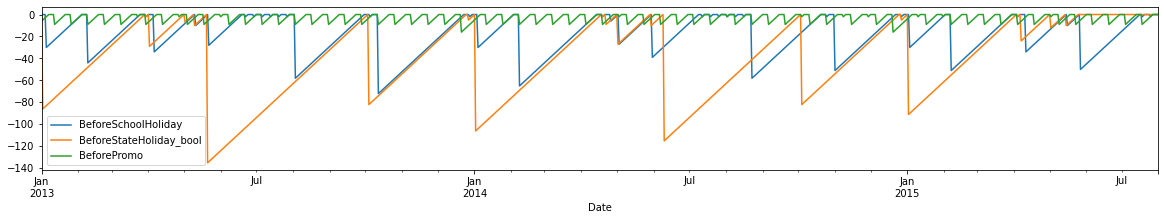

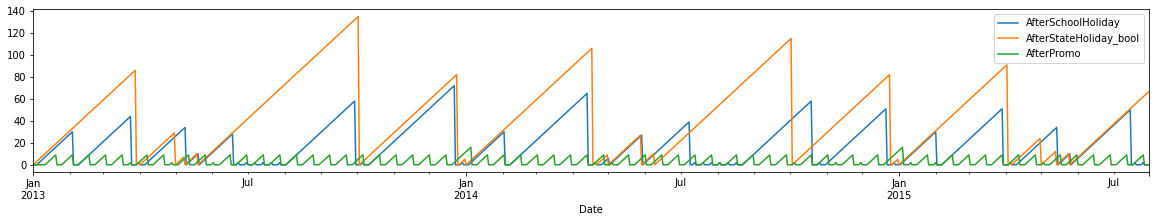

In [ ]:
plt.figure(figsize=(20,3))
df_train[df_train['Store'] == 282]['BeforeSchoolHoliday'].plot()
df_train[df_train['Store'] == 282]['BeforeStateHoliday_bool'].plot()
df_train[df_train['Store'] == 282]['BeforePromo'].plot()
plt.legend()
plt.show()

plt.figure(figsize=(20,3))
df_train[df_train['Store'] == 282]['AfterSchoolHoliday'].plot()
df_train[df_train['Store'] == 282]['AfterStateHoliday_bool'].plot()
df_train[df_train['Store'] == 282]['AfterPromo'].plot()
plt.legend()
plt.show()

###Suavizado

Se analiza que pasa los 7 días antes y los 7 días. Cuenta la cantidad de promos y feriados que hubo los 7 días antes y después del registro  para cada una de las fechas.

In [ ]:
# Datos del store 1 ordenados por fecha
df_train[df_train[['Store']+columns]['Store'] == 1].sort_values('Date').head(20)

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
Date,,,,,,,,,,
2013-01-01,1,0,True,1,0,0,0,0,0,-6
2013-01-02,1,0,False,1,0,0,1,-86,0,-5
2013-01-03,1,0,False,1,0,0,2,-85,0,-4
2013-01-04,1,0,False,1,0,0,3,-84,0,-3
2013-01-05,1,0,False,1,0,0,4,-83,0,-2
2013-01-06,1,0,False,1,0,0,5,-82,0,-1
2013-01-07,1,1,False,1,0,0,6,-81,0,0
2013-01-08,1,1,False,1,0,0,7,-80,0,0
2013-01-09,1,1,False,1,0,0,8,-79,0,0


In [ ]:
bwd_train = df_train[['Store']+columns].sort_index().groupby("Store", group_keys=True).rolling(7, min_periods = 1).sum()
bwd_test = df_test[['Store']+columns].sort_index().groupby("Store", group_keys=True).rolling(7, min_periods = 1).sum()
bwd_train.head(20)

SchoolHoliday  StateHoliday_bool  Promo
Store Date                                               
1     2013-01-01            1.0                1.0    0.0
      2013-01-02            2.0                1.0    0.0
      2013-01-03            3.0                1.0    0.0
      2013-01-04            4.0                1.0    0.0
      2013-01-05            5.0                1.0    0.0
      2013-01-06            6.0                1.0    0.0
      2013-01-07            7.0                1.0    1.0
      2013-01-08            7.0                0.0    2.0
      2013-01-09            7.0                0.0    3.0
      2013-01-10            7.0                0.0    4.0
      2013-01-11            7.0                0.0    5.0
      2013-01-12            6.0                0.0    5.0
      2013-01-13            5.0                0.0    5.0
      2013-01-14            4.0                0.0    4.0
      2013-01-15            3.0                0.0    3.0
      2013-01-16            2.0                0.0    2.0
      2013-01-17            1.0                0.0    1.0
      2013-01-18            0.0                0.0    0.0
      2013-01-19            0.0                0.0    0.0
      2013-01-20            0.0                0.0    0.0

In [ ]:
bwd_train.reset_index(inplace=True)
bwd_test.reset_index(inplace=True)
bwd_train.head(20)

,Store,Date,SchoolHoliday,StateHoliday_bool,Promo
0,1,2013-01-01,1.0,1.0,0.0
1,1,2013-01-02,2.0,1.0,0.0
2,1,2013-01-03,3.0,1.0,0.0
3,1,2013-01-04,4.0,1.0,0.0
4,1,2013-01-05,5.0,1.0,0.0
5,1,2013-01-06,6.0,1.0,0.0
6,1,2013-01-07,7.0,1.0,1.0
7,1,2013-01-08,7.0,0.0,2.0
8,1,2013-01-09,7.0,0.0,3.0
9,1,2013-01-10,7.0,0.0,4.0


In [ ]:
fwd_train = df_train[['Store']+columns].sort_index(ascending=False).groupby("Store").rolling(7, min_periods=1).sum()
fwd_test = df_test[['Store']+columns].sort_index(ascending=False).groupby("Store").rolling(7, min_periods=1).sum()
fwd_train.head(20)

SchoolHoliday  StateHoliday_bool  Promo
Store Date                                               
1     2015-07-31            1.0                0.0    1.0
      2015-07-30            2.0                0.0    2.0
      2015-07-29            3.0                0.0    3.0
      2015-07-28            4.0                0.0    4.0
      2015-07-27            5.0                0.0    5.0
      2015-07-26            5.0                0.0    5.0
      2015-07-25            5.0                0.0    5.0
      2015-07-24            4.0                0.0    4.0
      2015-07-23            3.0                0.0    3.0
      2015-07-22            2.0                0.0    2.0
      2015-07-21            1.0                0.0    1.0
      2015-07-20            0.0                0.0    0.0
      2015-07-19            0.0                0.0    0.0
      2015-07-18            0.0                0.0    0.0
      2015-07-17            0.0                0.0    1.0
      2015-07-16            0.0                0.0    2.0
      2015-07-15            0.0                0.0    3.0
      2015-07-14            0.0                0.0    4.0
      2015-07-13            0.0                0.0    5.0
      2015-07-12            0.0                0.0    5.0

In [ ]:
fwd_train.reset_index(inplace=True)
fwd_test.reset_index(inplace=True)
fwd_train.head(20)

,Store,Date,SchoolHoliday,StateHoliday_bool,Promo
0,1,2015-07-31,1.0,0.0,1.0
1,1,2015-07-30,2.0,0.0,2.0
2,1,2015-07-29,3.0,0.0,3.0
3,1,2015-07-28,4.0,0.0,4.0
4,1,2015-07-27,5.0,0.0,5.0
5,1,2015-07-26,5.0,0.0,5.0
6,1,2015-07-25,5.0,0.0,5.0
7,1,2015-07-24,4.0,0.0,4.0
8,1,2015-07-23,3.0,0.0,3.0
9,1,2015-07-22,2.0,0.0,2.0


In [ ]:
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

Se unen estos valores bwd y fwd a las tablas df_train y df_test

In [ ]:
df_train = df_train.merge(bwd_train, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df_train = df_train.merge(fwd_train, 'left', ['Date', 'Store'], suffixes=['', '_fw'])
df_test = df_test.merge(bwd_test, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df_test = df_test.merge(fwd_test, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

In [ ]:
df_train.drop(columns,1,inplace=True)
df_test.drop(columns,1,inplace=True)
df_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,2015-07-31,1,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2015-07-30,1,0,0,56,0,0,0,4.0,0.0,4.0,2.0,0.0,2.0
2,2015-07-29,1,0,0,55,0,0,0,3.0,0.0,3.0,3.0,0.0,3.0
3,2015-07-28,1,0,0,54,0,0,0,2.0,0.0,2.0,4.0,0.0,4.0
4,2015-07-27,1,0,0,53,0,0,0,1.0,0.0,1.0,5.0,0.0,5.0


Se pasan los dates a formato datetime

In [ ]:
df_train["Date"] = pd.to_datetime(df_train.Date)
df_test["Date"] = pd.to_datetime(df_test.Date)
df_train.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,2015-07-31,1,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2015-07-30,1,0,0,56,0,0,0,4.0,0.0,4.0,2.0,0.0,2.0
2,2015-07-29,1,0,0,55,0,0,0,3.0,0.0,3.0,3.0,0.0,3.0
3,2015-07-28,1,0,0,54,0,0,0,2.0,0.0,2.0,4.0,0.0,4.0
4,2015-07-27,1,0,0,53,0,0,0,1.0,0.0,1.0,5.0,0.0,5.0


Se visualiza la data para before y after

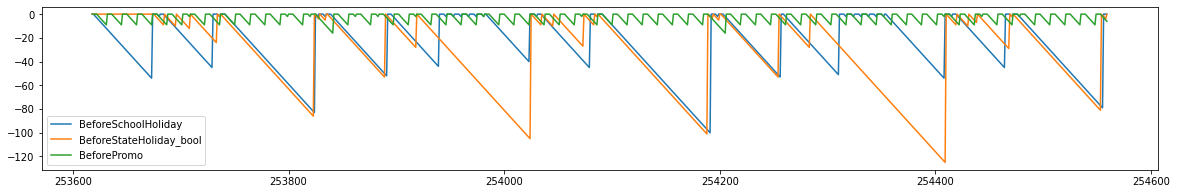

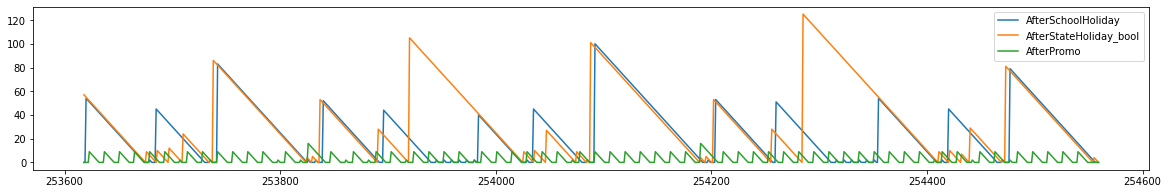

In [ ]:
plt.figure(figsize=(20,3))
df_train[df_train['Store'] == 280]['BeforeSchoolHoliday'].plot()
df_train[df_train['Store'] == 280]['BeforeStateHoliday_bool'].plot()
df_train[df_train['Store'] == 280]['BeforePromo'].plot()
plt.legend()
plt.show()

plt.figure(figsize=(20,3))
df_train[df_train['Store'] == 280]['AfterSchoolHoliday'].plot()
df_train[df_train['Store'] == 280]['AfterStateHoliday_bool'].plot()
df_train[df_train['Store'] == 280]['AfterPromo'].plot()
plt.legend()
plt.show()

Se une df_train y df_test a joined_train y joined_test

In [ ]:
def join_df(left, right, left_on, right_on=None):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", "_y"))

In [ ]:
joined_train = join_df(joined_train, df_train, ['Store', 'Date'])
joined_test = join_df(joined_test, df_test, ['Store', 'Date'])

Se guarda la tabla con las caracteristicas del preprocesado

In [ ]:
joined_train.to_feather('/gdrive/Shareddrives/Redes de Piluchina/TP 2_final/all_preprocessed_train.fth')
joined_test.to_feather('/gdrive/Shareddrives/Redes de Piluchina/TP 2_final/all_preprocessed_test.fth')

Se visualizan los  días que hubo feriados y promos, además, la suma de la cantidad de feriados y promos de los 7 días anteriores y posteriores (incluyendo el actual) para el store 280 para cada fecha del registro:

Text(0.5, 1.0, 'Promo')

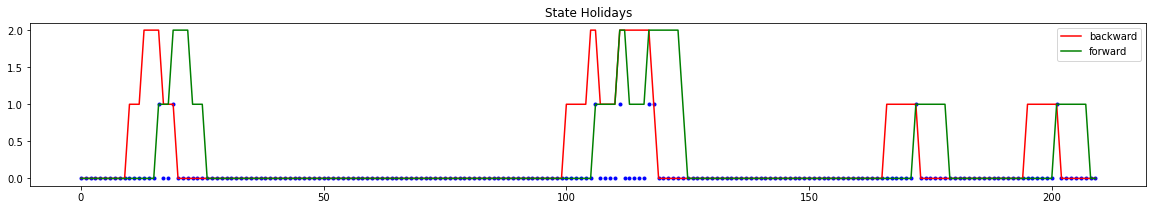

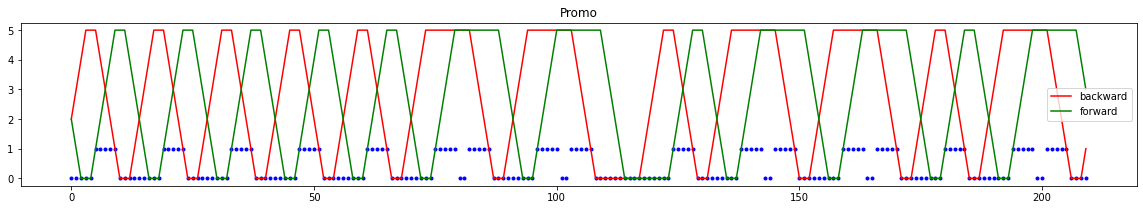

In [ ]:
plt.figure(figsize=(20,3))
plt.plot(joined_train[joined_train['Store']==280]['StateHoliday_bool'].values[100:310]*1.0, c='b', marker='.', linestyle='None')
plt.plot(joined_train[joined_train['Store']==280]['StateHoliday_bool_bw'].values[100:310]*1.0, c='r', label='backward')
plt.plot(joined_train[joined_train['Store']==280]['StateHoliday_bool_fw'].values[100:310]*1.0, c='g', label='forward')
plt.legend()
plt.title('State Holidays')
plt.figure(figsize=(20,3))
plt.plot(joined_train[joined_train['Store']==280]['Promo'].values[100:310]*1.0, c='b', marker='.', linestyle='None')
plt.plot(joined_train[joined_train['Store']==280]['Promo_bw'].values[100:310]*1.0, c='r', label='backward')
plt.plot(joined_train[joined_train['Store']==280]['Promo_fw'].values[100:310]*1.0, c='g', label='forward')
plt.legend()
plt.title('Promo')

In [ ]:
joined_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,...,0,0,0,-6,1.0,1.0,0.0,4.0,1.0,1.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,...,0,0,0,-6,1.0,1.0,0.0,4.0,1.0,1.0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,...,0,0,0,-6,1.0,1.0,0.0,4.0,1.0,1.0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,...,0,0,0,-6,1.0,1.0,0.0,4.0,1.0,1.0


##Normalizado y encode

Se hace normalizacion para variables continuas y label encode para las variables categoricas.

In [ ]:
df_train = pd.read_feather('all_preprocessed_train.fth')
df_test = pd.read_feather('all_preprocessed_test.fth')

Al restar las columnas del train con el test, vemos que nos devuelve las dos columnas que tenemos que predecir ya que el conjunto test no las tiene. 

In [ ]:
set(df_train.columns) - set(df_test.columns)

{'Customers', 'Sales'}

###Variables Categoricas

In [ ]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 
            'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 
            'CompetitionOpenSinceYear', 'Promo2SinceYear', 
            'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 
            'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 
            'SchoolHoliday_bw']

Cantidad de valores que puede tomar cada variable categórica, el tipo y la cantidad de datos faltantes.

In [ ]:
DataFrameSummary(df_train[cat_vars]).summary().loc[['uniques', 'types', 'missing']].T


,uniques,types,missing
Store,1115,numeric,0
DayOfWeek,7,numeric,0
Year,3,numeric,0
Month,12,numeric,0
Day,31,numeric,0
StateHoliday,4,categorical,0
CompetitionMonthsOpen,25,numeric,0
Promo2Weeks,26,numeric,0
StoreType,4,categorical,0
Assortment,3,categorical,0


###Variables Continuas

In [ ]:
df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State', 'file', 'week', 'trend',
       'Date_y', 'Month_y', 'Day_y', 'file_DE', 'week_DE', 'trend_DE',
       'Date_DE', 'State_DE', 'Month_DE', 'Day_DE', 'file_y',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'Cl

In [ ]:
contin_vars = ['CompetitionDistance', 
               'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 
               'Precipitationmm', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 
               'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 
               'trend_DE', 'AfterStateHoliday_bool', 'BeforeStateHoliday_bool', 
               'Promo', 'SchoolHoliday', 'StateHoliday_bool']

Cantidad de valores que puede tomar cada variable continua, el tipo y la cantidad de datos faltantes.

In [ ]:
DataFrameSummary(df_train[contin_vars]).summary().loc[['uniques', 'types', 'missing']].T

,uniques,types,missing
CompetitionDistance,654,numeric,0
Max_TemperatureC,50,numeric,0
Mean_TemperatureC,45,numeric,0
Min_TemperatureC,40,numeric,0
Precipitationmm,40,numeric,0
Max_Humidity,52,numeric,0
Mean_Humidity,71,numeric,0
Min_Humidity,93,numeric,0
Max_Wind_SpeedKm_h,42,numeric,0
Mean_Wind_SpeedKm_h,27,numeric,0


###Normalizacion en continuas y label encode en categoricas

Para las categoricas


*   Con LabelEncoder() se codifica las etiquetas categoricas (labels) con un valor entre 0 y n_classes-1.




In [ ]:
cat_maps = [(o, LabelEncoder()) for o in cat_vars]


In [ ]:
mapper_cat = DataFrameMapper(cat_maps)
_ = mapper_cat.fit(df_train)

In [ ]:
N = 10
print(list(zip(df_train['Assortment'].values[:N], mapper_cat.transform(df_train)[:,9][:N])))
print(list(zip(df_train['Events'].values[:N], mapper_cat.transform(df_train)[:,15][:N])))
print(list(zip(df_train['Year'].values[:N], mapper_cat.transform(df_train)[:,2][:N])))

[('a', 0), ('a', 0), ('a', 0), ('c', 2), ('a', 0), ('a', 0), ('c', 2), ('a', 0), ('c', 2), ('a', 0)]
[('Fog', 0), ('Fog', 0), ('Fog', 0), ('Sunny', 20), ('Sunny', 20), ('Sunny', 20), ('Rain', 10), ('Rain', 10), ('Fog', 0), ('Sunny', 20)]
[(2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2)]


In [ ]:
# La hacemos con todas ahora
df_train[cat_vars] = mapper_cat.transform(df_train)
df_test[cat_vars] = mapper_cat.transform(df_test)

Para las continuas


*   Con StandardScaler() se normalizan las variables continuas siguiendo la siguiente fórmula:
$$z = \frac{x-\mu}{s}$$




In [ ]:
contin_maps = [([o], StandardScaler()) for o in contin_vars]

In [ ]:
mapper_cont = DataFrameMapper(contin_maps)
_ = mapper_cont.fit(df_train)

In [ ]:
N = 10
print(df_train['CompetitionDistance'].values[:N])
print(mapper_cont.transform(df_train)[:, 0][:N])

[ 1270.   570. 14130.   620. 29910.   310. 24000.  7520.  2030.  3160.]
[-0.51104292 -0.59341201  1.00219483 -0.5875285   2.85902934 -0.62400624
  2.16359893  0.22439533 -0.42161363 -0.28864639]


In [ ]:
df_train[contin_vars] = mapper_cont.transform(df_train)
df_test[contin_vars] = mapper_cont.transform(df_test)

In [ ]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,0,4,2015-07-31,5263,555,1,1.273237,0,2.144211,2,...,0.644376,1.072424,0,0,5,0,5,1,0,1
1,1,4,2015-07-31,6064,625,1,1.273237,0,2.144211,2,...,0.965073,1.072424,0,0,5,0,5,1,0,1
2,2,4,2015-07-31,8314,821,1,1.273237,0,2.144211,2,...,0.644376,1.072424,0,0,5,0,5,1,0,1
3,3,4,2015-07-31,13995,1498,1,1.273237,0,2.144211,2,...,0.965073,1.072424,0,0,5,0,5,1,0,1
4,4,4,2015-07-31,4822,559,1,1.273237,0,2.144211,2,...,0.644376,1.072424,0,0,5,0,5,1,0,1


In [ ]:
DataFrameSummary(df_train[cat_vars]).summary().loc[['uniques', 'types']]

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_bool_fw,StateHoliday_bool_bw,SchoolHoliday_fw,SchoolHoliday_bw
uniques,1115,7,3,12,31,4,25,26,4,3,...,8,12,52,22,6,6,3,3,8,8
types,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,...,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


##Final Processing

In [ ]:
df_train.shape

(1017209, 81)

Se ve cuantos Sales==0 en el dataset

In [ ]:
len(df_train[df_train.Sales==0])

172871

Cuantos registros hay cuando la tienda estuvo cerrada.

In [ ]:
len(df_train[df_train.Open==0])

172817

Se eliminan los Sales==0

In [ ]:
df_sales = df_train[df_train.Sales!=0]

In [ ]:
df_sales.shape

(844338, 81)

In [ ]:
df_test.reset_index(inplace=True)
df_train.reset_index(inplace= True)
df_sales.reset_index(inplace=True)

In [ ]:
df_sales.to_feather('train_normalized_data.fth')

In [ ]:
df_test.to_feather('test_normalized_data.fth')

In [ ]:
from google.colab import files

files.download('train_normalized_data.fth')
files.download('test_normalized_data.fth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
(df_test['Open'] == 0).sum()

5984

In [ ]:
(df_sales['Open'] == 0).sum()

0

In [ ]:
(df_train['CompetitionDistance'].isna()).sum()

0

#Resultados:


Se probaron dos modelos con los scipts provistos por la catedra:
El primero fue el modelo **06-full-model** el cual se trata de un modelo de redes neuronales de Keras, con los siguientes parametros:


*   l2_lambda = 1e-3
*   kernel_initializer="uniform"

Ademas usa relu como funcion de activacion, y tiene una primer capa oculta de 1000 neuronas y una segunda capa oculta de 500 neuronas.
Sin embargo usando este modelo no se obtuvo un buen score ya que fue mayor a 0.5.
El segundo modelo que se utilizo fue el llamado LightGBM el cual hace regresion
mediante la clase LGBMRegressor, con los siguienets parametros:



*   "early_stopping_rounds":100 
*   "eval_set" : [(X_val, y_val.reshape(-1))]
*   'eval_names': ['valid']
*   'verbose': 100,
*   'feature_name': 'auto' (default)
*   'categorical_feature': cat_vars
*   "eval_metric" : 'l2'


Este modelo tuvo un mejor score que el anterior, dentro del rango aceptado.
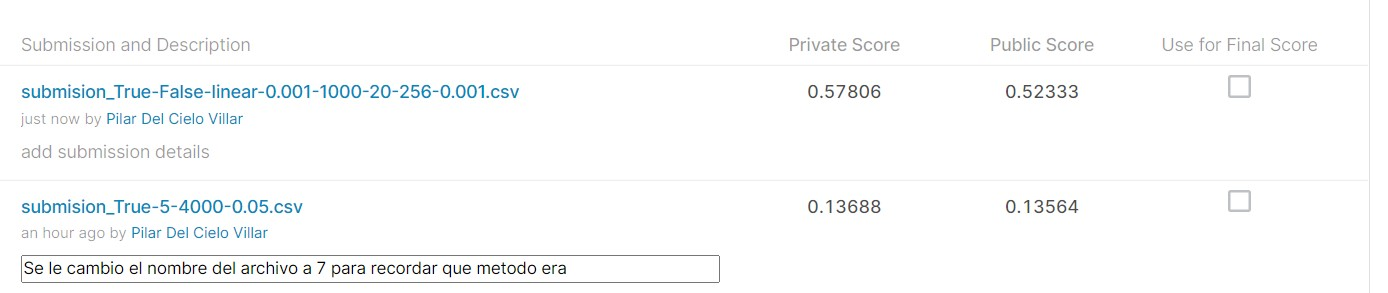



El subbmit que tiene la aclaracion abajo es el del ultimo metodo, y tiene esa acalracion por que cuando se cargo tenia otro nombre, pero para recordar con 
que metodo habia sido obtenido luego se lo cambie por el numero 7, que es el nombre final y el que se va a ver cuando suba el archivo.











#Preguntas

**¿Qué son los Entity Embeddings y cómo se relacionan con las variables 
categóricas?** 

Las varibles categoricas, a diferencia de las variables continuas, clasifica a lso individuos o casos, normalmente toman valores representados por numeros enteros, es decir son discretas y son solo representaciones.

Dado que los modelos con redes neuronales funcionan mejor cuando la entrada en un vector continuo surge la tecnica Entity Embeddings.

Es una tecnica en la cual se mapean las variables categoricas en un problema de aproximación de funciones en espacios euclidianos, este mapeo mejora el uso de los datos cuando van a ser entrados a una red neuronal, no solo reduce el uso de memoria y acelera las redes neuronales en comparación con la codificación one-hot, sino que ademas mediante el mapeo de valores  similares cercanos entre sí en el espacio de embbeding revela las propiedades intrínsecas de la
variables categóricas.

En resumen, el Embedding se encarga de que datos de alta dimensionalidad se conviertan en datos de baja dimensionalidad (encuentra relaciones entre los datos y baja las dimensiones del problema) que proporcionan mucha información. El embedding se usa entonces como un pre-entrenamiento de los datos.


**Explique la métrica utilizada en la competencia.**

La metrica usada en la competencia es: 




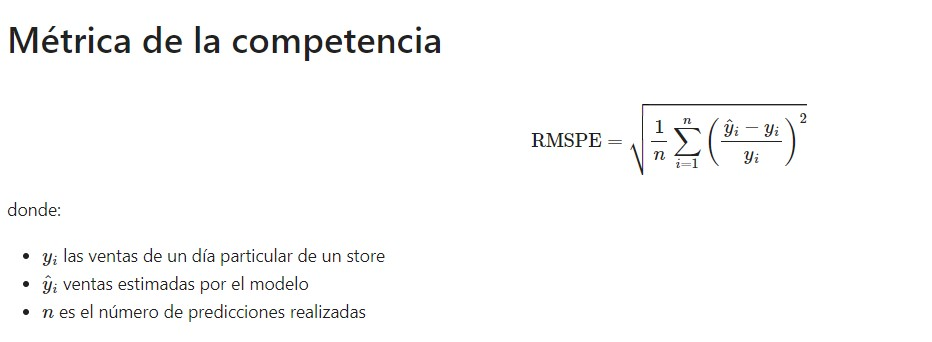

En primer lugar hay que entender que MSPE resume la capacidad predictiva de un modelo. Idealmente, este valor debería estar cerca de cero, lo que significa que su predictor está cerca del valor real. El concepto es similar al error cuadrático medio (MSE), que es una medida de qué tan bien un estimador mide un parámetro (o qué tan cerca está una línea de regresión de un conjunto de puntos). La diferencia es que mientras MSE mide el ajuste de un estimador, MSPE es una medida del ajuste de un predictor, o qué tan bien predice el valor real. 
Luego, 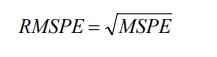



In [10]:
pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh

In [13]:
pip freeze > requirements.txt